# SABR Model for Interest Rates

We examine the SABR model

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from financepy.utils import *
from financepy.models.FinModelSABR import *

## SABR Model

I examine the volatility as a function of strike

In [38]:
strikes = np.linspace(0.01, 0.10, 100)

In [39]:
f = 0.032

In [40]:
texp = 2.0

In [41]:
alpha = 0.174; beta = 1.0; rho = -0.90; nu = 0.817

In [42]:
model = FinModelSABR(alpha, beta, rho, nu)

In [43]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.174
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [44]:
volsSABR = model.black_vol(f, strikes, texp) * 100

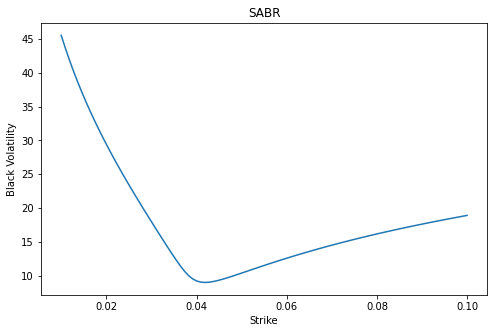

In [45]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility");

## Calibration - Fitting to the ATM Vol

In [46]:
blackVol = 0.22

In [47]:
f = 0.032

In [48]:
k = f

In [49]:
model.setAlphaFromATMBlackVol(blackVol, k, texp)

In [50]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.2486852107791646
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [51]:
model.black_vol(f, k, texp) * 100

22.000000000000004

The SABR model now fits the ATM volatility exactly

In [52]:
volsSABR = model.black_vol(f, strikes, texp) * 100

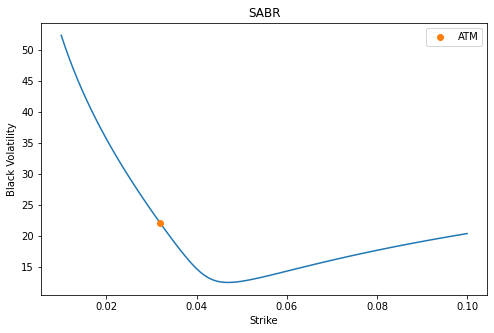

In [53]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend()

## Calibration - Fitting to the Any Strike Vol

In [54]:
blackVol = 0.26

In [55]:
f = 0.032

In [56]:
k = 0.040

In [57]:
model.setAlphaFromBlackVol(blackVol, f, k, texp)

In [58]:
model

OBJECT TYPE: FinModelSABR
Alpha: 0.39753702450996625
Beta: 1.0
Nu: 0.817
Rho: -0.9

In [59]:
volsSABR = model.black_vol(f, strikes, texp) * 100

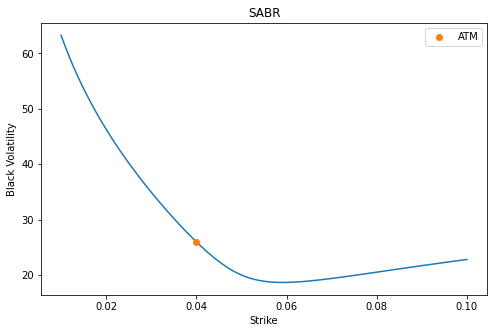

In [62]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

Copyright (c) 2020 Dominic O'Kane